In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\text{minimize}\ x^TAx\quad \text{subject to}\ x\in S^{n-1}$

In [2]:
import sys

sys.path += ['..']
from modules.total_variation_sphere import TVonSphere

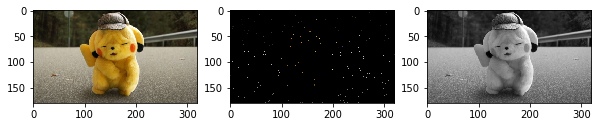

In [8]:
import cv2

img = cv2.cvtColor(cv2.imread('../data/pikachu.jpeg'), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
mask = np.random.rand(np.prod(img.shape[:2])).reshape(*img.shape[:2], 1)
mask = np.uint8(mask > 0.99)
brightness = np.linalg.norm(img.astype(np.float32), axis=-1, keepdims=True)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img)
plt.grid(False)
plt.subplot(1,3,2)
plt.imshow(mask * img)
plt.grid(False)
plt.subplot(1,3,3)
plt.imshow(brightness[:,:,0], cmap='gray')
plt.grid(False)
plt.show()

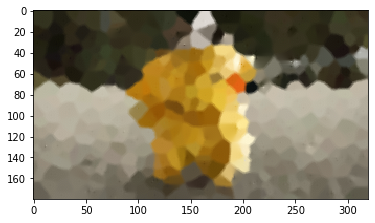

In [9]:
inpainted = cv2.inpaint(img, 255 - np.uint8(mask[:, :, 0] > 0) * 255, 3, cv2.INPAINT_TELEA)
plt.imshow(inpainted)

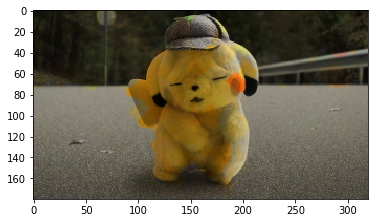

In [10]:
tv = TVonSphere()
tv.mask = mask
hoge = tv._initialize(img)
huga = hoge * brightness
huga = huga - np.min(huga)
huga = huga / np.max(huga)
plt.imshow(huga)

In [6]:
tv = TVonSphere(c=1.)
X = tv.transform(img, mask=mask)

100%|██████████| 10/10 [01:20<00:00,  8.00s/it]


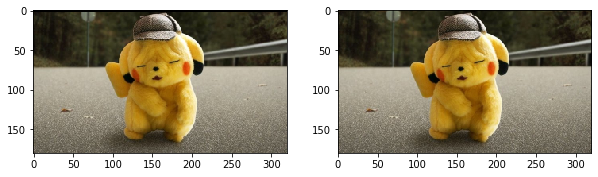

In [7]:
result = X * brightness
result = result - np.min(result)
result = result / np.max(result)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(huga)
plt.subplot(1,2,2)
plt.imshow(result)